In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from google.colab import files
uploaded = files.upload()

Saving Copy of adult.csv to Copy of adult (2).csv


In [69]:
data = pd.read_csv('Copy of adult.csv')

In [70]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [72]:
data.duplicated().sum()

52

In [73]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [74]:
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

In [75]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


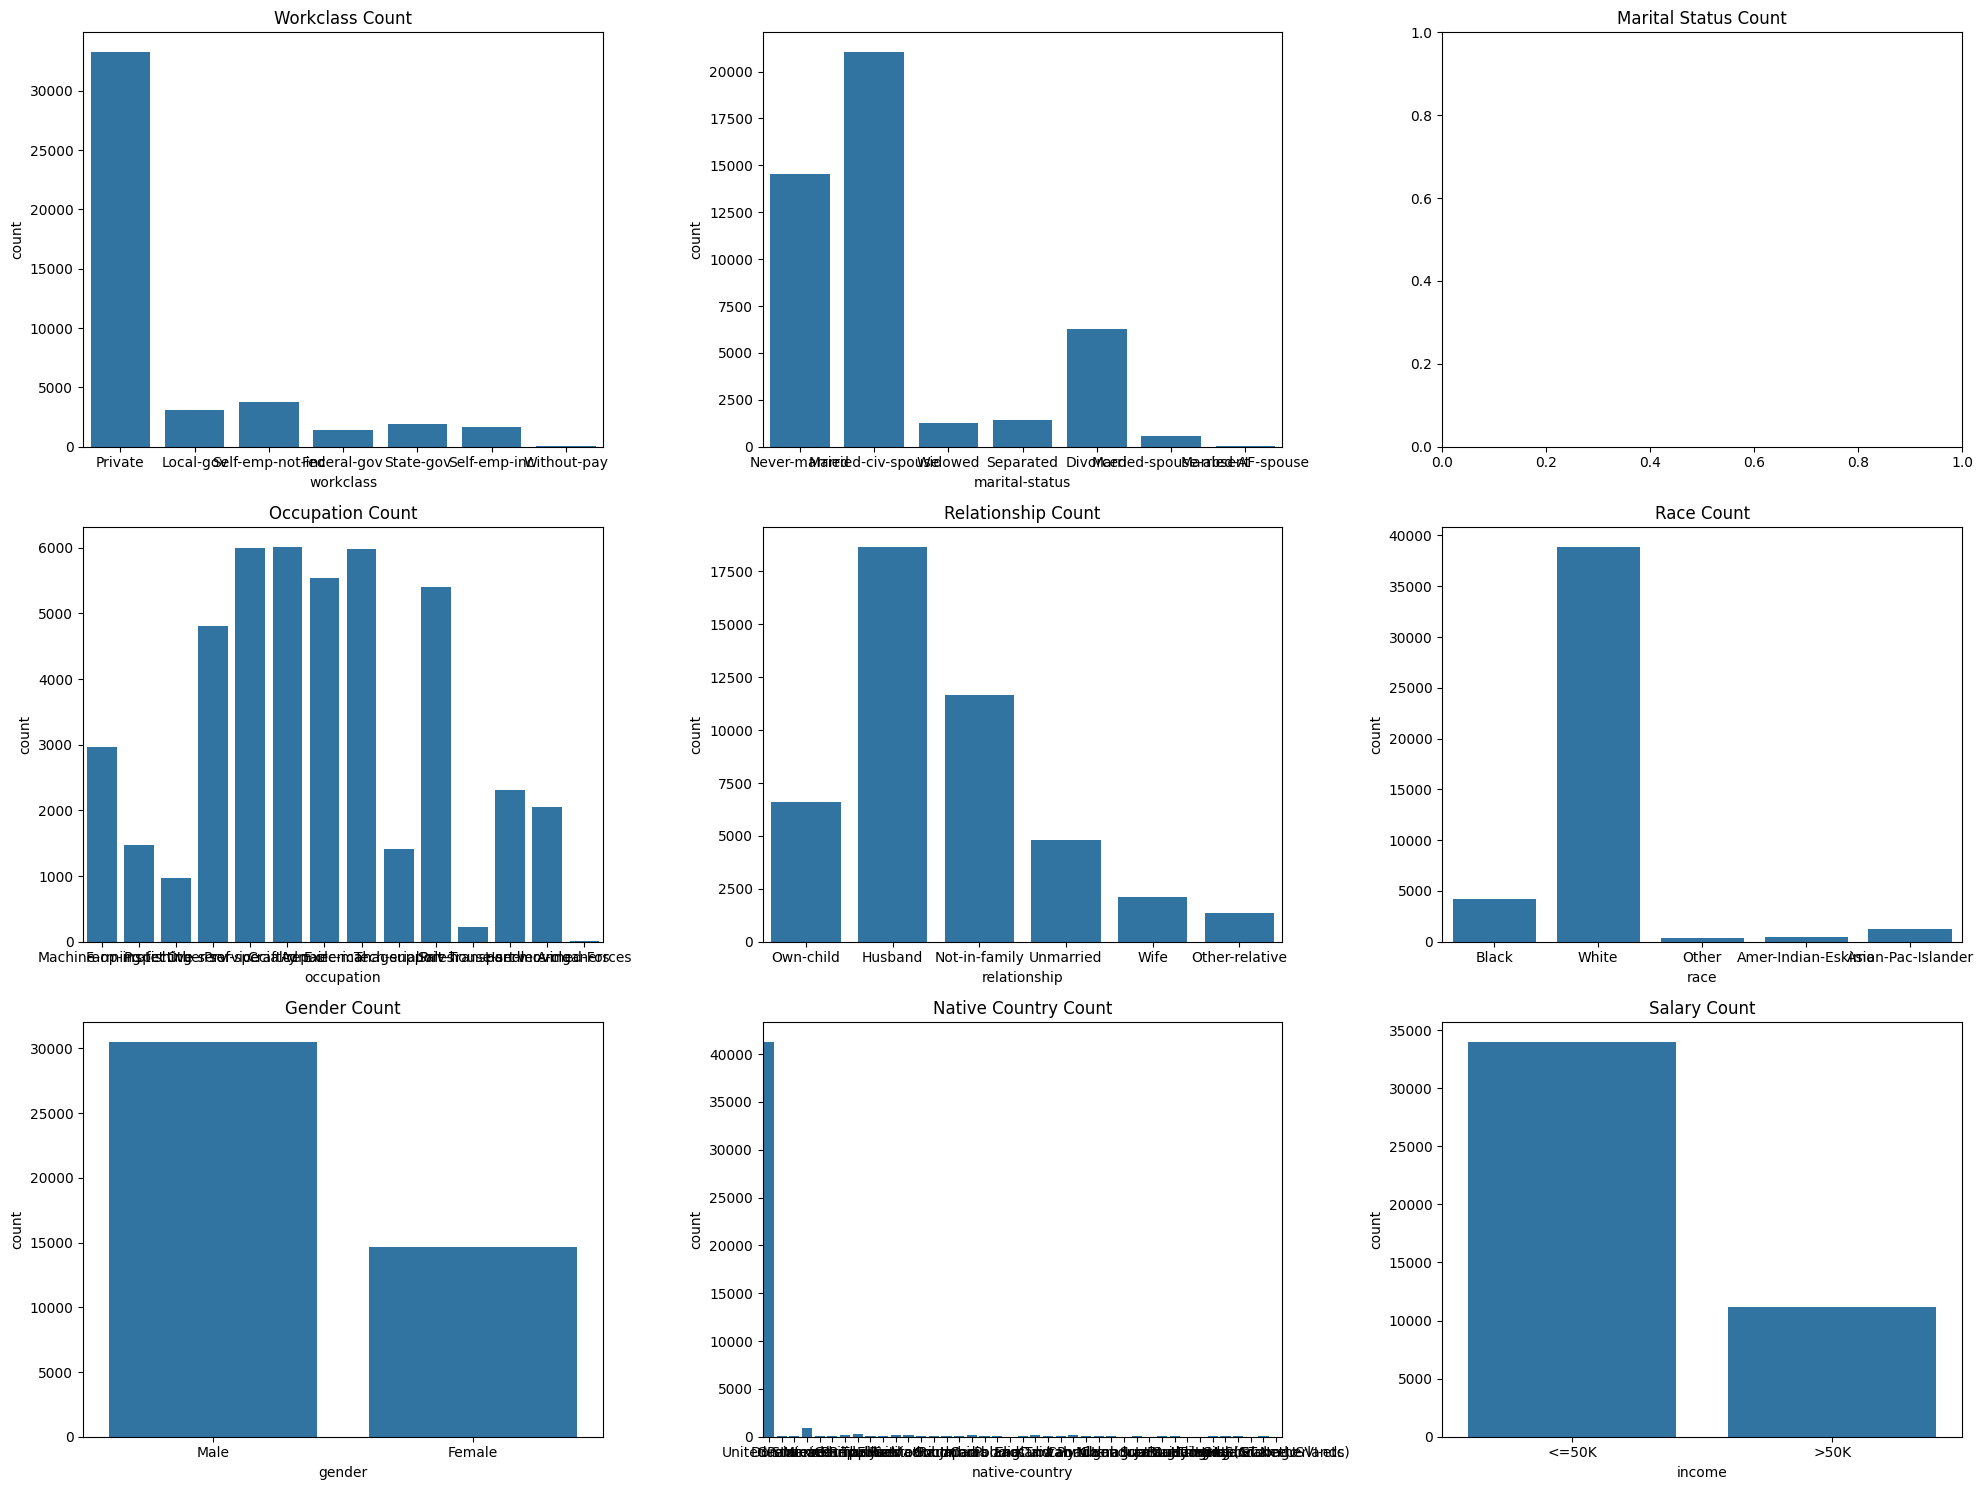

In [76]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

sns.countplot(x='workclass', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Workclass Count')

sns.countplot(x='marital-status', data=data, ax=axes[0, 1])
axes[0, 2].set_title('Marital Status Count')

sns.countplot(x='occupation', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Occupation Count')

sns.countplot(x='relationship', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Relationship Count')

sns.countplot(x='race', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Race Count')

sns.countplot(x='gender', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Gender Count')

sns.countplot(x='native-country', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Native Country Count')

sns.countplot(x='income', data=data, ax=axes[2, 2])
axes[2, 2].set_title('Salary Count')

plt.tight_layout()
plt.show()

In [77]:
data.drop(columns = 'education', inplace = True)

In [78]:
from sklearn.preprocessing import LabelEncoder

In [82]:
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']
for column in categorical_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

In [83]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,6,4,7,1,4,1,0,0,30,38,0


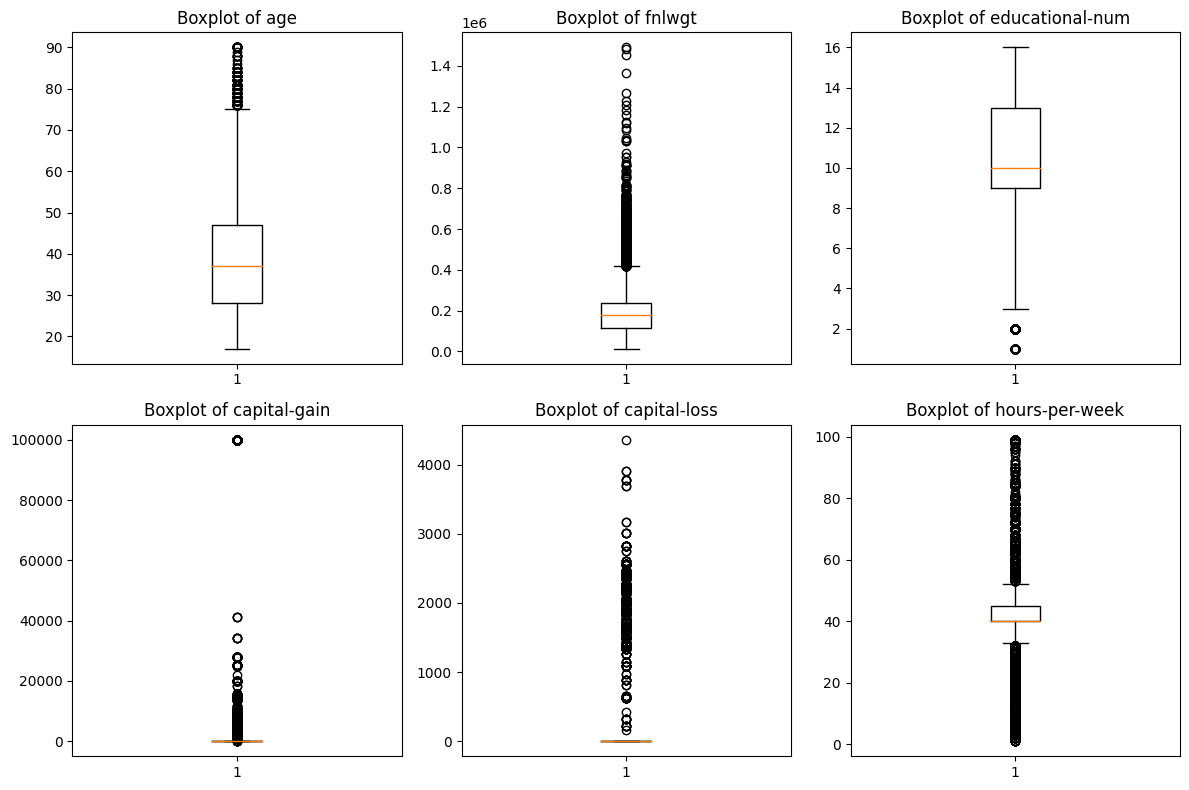

In [86]:
numerical_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [88]:
# Calculate the IQR for each column and remove outliers
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
filtered_data = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [89]:
filtered_data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,38,1
8,24,2,369667,10,4,7,4,4,0,0,0,40,38,0
11,36,0,212465,13,2,0,0,4,1,0,0,40,38,0


In [91]:
for column in data.columns:
    print(column ,":", data[column].nunique())

age : 74
workclass : 7
fnlwgt : 26741
educational-num : 16
marital-status : 7
occupation : 14
relationship : 6
race : 5
gender : 2
capital-gain : 121
capital-loss : 97
hours-per-week : 96
native-country : 41
income : 2
